In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/CMB')

In [ ]:

! pip install -q 'healpy==1.13.0' 'astropy==4.0'

     |████████████████████████████████| 11.8 MB 33.8 MB/s 
     |████████████████████████████████| 6.5 MB 52.1 MB/s 


In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as mpl
import argparse
import pylab as plt
import os
import sys
import shutil
from glob import glob
from random import choice,shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
cl = np.load('./cl_planck_lensed.npy') 
ll = cl[ : ,0]
cl = cl[ : ,1]

In [ ]:
arrayp=hp.sphtfunc.synfast(cl,2048)


/usr/local/lib/python3.7/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


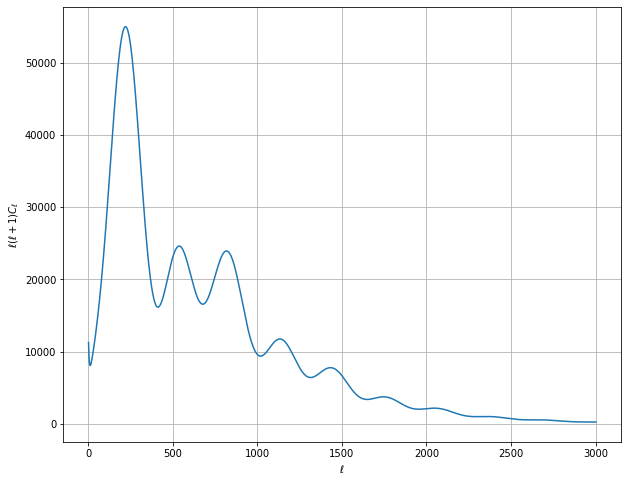

In [ ]:
ll=ll[:3000]
cl=cl[:3000]
plt.figure(figsize=(10, 8))
plt.plot(ll, ll * (ll + 1) * cl/2*np.pi )
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
# healpy.write_cl("cl.fits", cl, overwrite=True)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


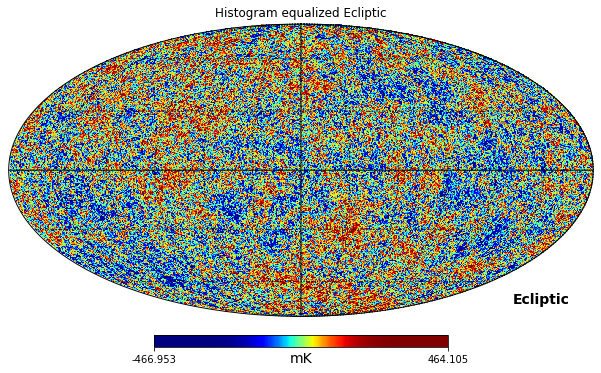

In [ ]:
hp.mollview(
    arrayp,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    cmap='jet'
)
hp.graticule()

In [ ]:
#!wget -O 'dl url'
#!wget --help
planck_mask = hp.read_map('COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits').astype(np.bool_)

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


In [ ]:
wmap_map_I_masked = hp.ma(arrayp)
wmap_map_I_masked.mask = np.logical_not(planck_mask) 

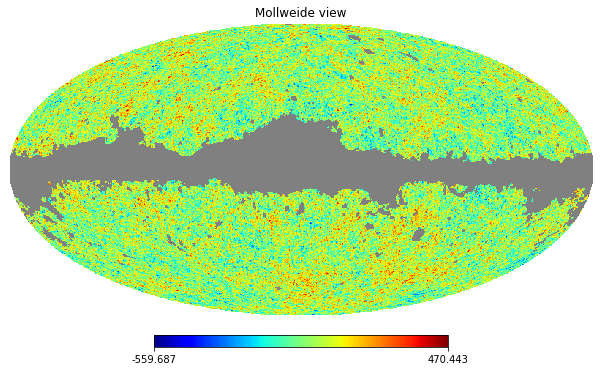

In [ ]:
hp.mollview(wmap_map_I_masked.filled(),cmap='jet')

In [ ]:
!pip install git+https://github.com/vafaei-ar/ccgpack.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/vafaei-ar/ccgpack.git to /tmp/pip-req-build-rl3ui0fu
  Running command git clone -q https://github.com/vafaei-ar/ccgpack.git /tmp/pip-req-build-rl3ui0fu
  Created wheel for ccgpack: filename=ccgpack-0.1.0-cp37-cp37m-linux_x86_64.whl size=912880 sha256=785279c10f1d09dcd57fdc40d0fb1a76b0a3d9234ff42027b89c5148c93a3cc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-a1kff7vr/wheels/12/6f/95/7ae57565d174cea0e92a0da0a36f289e045f46ef2173da656b
Successfully built ccgpack


In [ ]:
from ccgpack import sky2patch,ch_mkdir,pop_percent,download

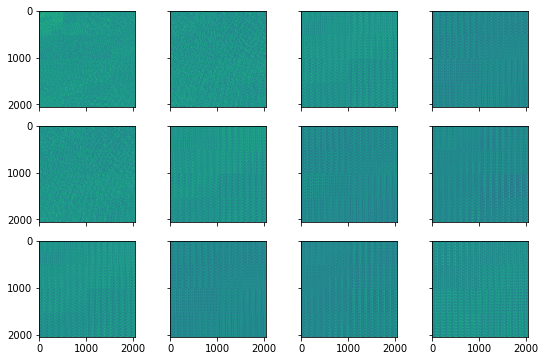

In [ ]:
patch = sky2patch(wmap_map_I_masked ,npatch=1)
# patch[0].shape
fig,ax=plt.subplots(3,4,figsize=[9,6], sharex=True, sharey=True)
ax.shape
for j in range(4):
  for i in range(3):
    ax[i,j].imshow(patch[i+j])
